In [2]:
from util.bpc_util import *

In [3]:
import matplotlib
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

F:\working-directory\anaconda\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  This is separate from the ipykernel package so we can avoid doing imports until


In [5]:
plt.rcParams['figure.figsize'] = (7,5)

In [4]:
%load_ext autoreload

In [5]:
%autoreload

# Synthetic Dataset 

We run the tests on the synthetic dataset, with the following settings:

* Normalized Laplacian (i.e. $\chi_k$ are now normalized by degree matrix $D$)
* ...

## Regime 1
$$\epsilon = \tau^2, \gamma = \tau^{\alpha}$$

This corresponds to ``little_oh = False``

In [8]:
rand = True
Ns = [100,100,100]
fs = 5
density_= 0.8
normalized = True
little_oh = False
_save = False

norm_s = 'n'
if not normalized:
    norm_s = 'u'
param_str = 'rand_%d_Ns_%d_%d_%d_fs_%d_L_%s_lo_%d' % (int(rand), Ns[0], Ns[1], Ns[2], fs, norm_s, int(little_oh))
print(param_str)


# Get the overall setup, including ground truth u and separated graph W_0
Ns, u, B, labeled, draws, W_0 = syn_overall_setup(rand, Ns, fs, normalized, density_)


n = 20
T   = np.power(0.6, range(5, n+5))
ALPHAS = [0.25,0.5,0.75, 1, 1.5, 2, 2.5, 3., 3.5, 4., 4.5, 5.]
TRC, TRCBC, BIAS = syn_run_test(T, ALPHAS, Ns, B, labeled, u, W_0, little_oh=little_oh) 


print(TRC.shape)
print(TRCBC.shape)
print(BIAS.shape)

rand_1_Ns_100_100_100_fs_5_L_n_lo_0
(12, 20)
(12, 20)
(12, 20)


findfont: Font family ['FreeSerif'] not found. Falling back to DejaVu Sans.


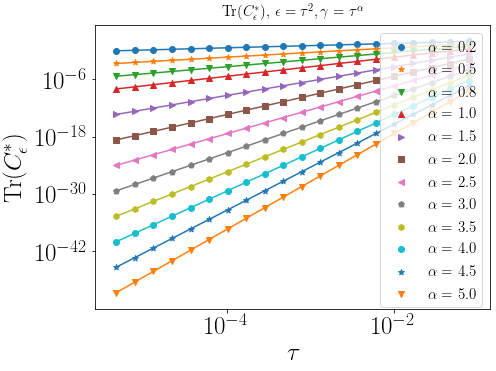

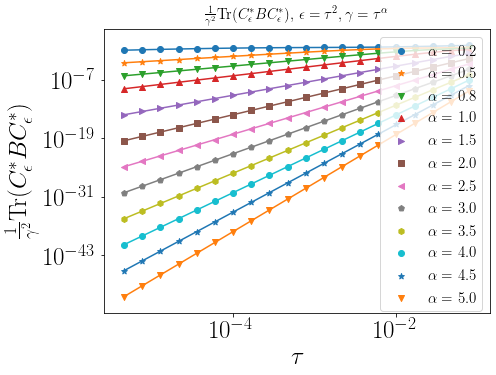

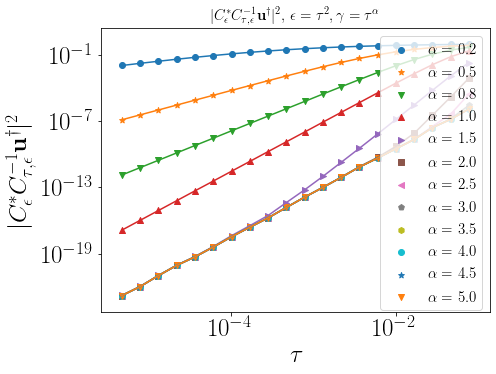

In [9]:
syn_plot_data(T, TRC, ALPHAS, param_str, title_= r'$\mathrm{Tr}(C_\epsilon^*)$', \
          val_str='TRC', save=_save, Jval=-1, little_oh=little_oh)
syn_plot_data(T, TRCBC, ALPHAS, param_str, title_= r'$\frac{1}{\gamma^2}\mathrm{Tr}(C_\epsilon^*BC_\epsilon^*)$', \
          val_str='TRCBC', save=_save, Jval=-1, little_oh=little_oh)
syn_plot_data(T, BIAS, ALPHAS, param_str, title_= r'$|C_\epsilon^*C_{\tau, \epsilon}^{-1}\mathbf{u}^\dagger|^2$', \
          val_str='BIAS', save=_save, Jval=-1, little_oh=little_oh)

Line fitting for TRC
The slope for alpha = 0.2 is : 0.4752
The slope for alpha = 0.5 is : 0.9992
The slope for alpha = 0.8 is : 1.5000
The slope for alpha = 1.0 is : 2.0000
The slope for alpha = 1.5 is : 3.0000
The slope for alpha = 2.0 is : 4.0000
The slope for alpha = 2.5 is : 5.0000
The slope for alpha = 3.0 is : 6.0000
The slope for alpha = 3.5 is : 7.0000
The slope for alpha = 4.0 is : 8.0000
The slope for alpha = 4.5 is : 9.0000
The slope for alpha = 5.0 is : 10.0000
Saving figure at ./figures/BPCpaper/rand_1_Ns_100_100_100_fs_5_L_n_lo_0_TRC.png


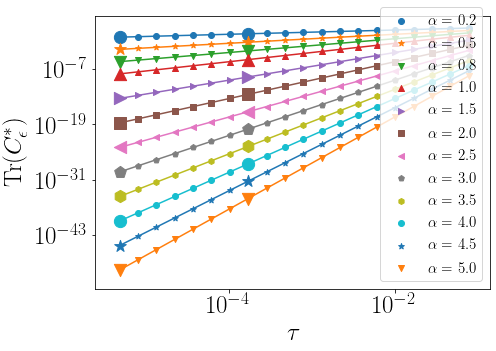

Line fitting for TRCBC
The slope for alpha = 0.2 is : 0.3050
The slope for alpha = 0.5 is : 0.9947
The slope for alpha = 0.8 is : 1.4999
The slope for alpha = 1.0 is : 2.0000
The slope for alpha = 1.5 is : 3.0000
The slope for alpha = 2.0 is : 4.0000
The slope for alpha = 2.5 is : 5.0000
The slope for alpha = 3.0 is : 6.0000
The slope for alpha = 3.5 is : 7.0000
The slope for alpha = 4.0 is : 8.0000
The slope for alpha = 4.5 is : 9.0000
The slope for alpha = 5.0 is : 10.0000
Saving figure at ./figures/BPCpaper/rand_1_Ns_100_100_100_fs_5_L_n_lo_0_TRCBC.png


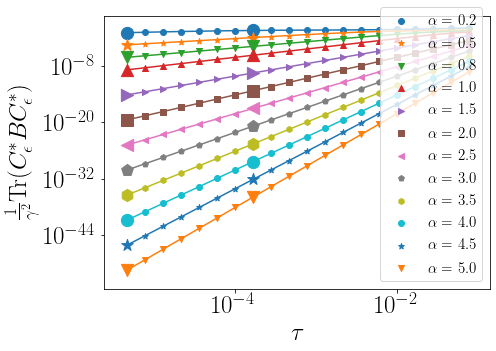

Line fitting for BIAS
The slope for alpha = 0.2 is : 0.7691
The slope for alpha = 0.5 is : 1.9936
The slope for alpha = 0.8 is : 3.0002
The slope for alpha = 1.0 is : 4.0004
The slope for alpha = 1.5 is : 4.0684
The slope for alpha = 2.0 is : 3.9861
The slope for alpha = 2.5 is : 3.9862
The slope for alpha = 3.0 is : 3.9862
The slope for alpha = 3.5 is : 3.9863
The slope for alpha = 4.0 is : 3.9864
The slope for alpha = 4.5 is : 3.9866
The slope for alpha = 5.0 is : 3.9866
Saving figure at ./figures/BPCpaper/rand_1_Ns_100_100_100_fs_5_L_n_lo_0_BIAS.png


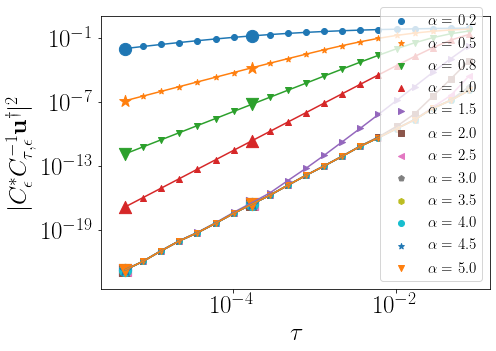

In [10]:
nt = len(T)
t_ranges = len(ALPHAS)*[(12,nt)]
_save=True
rms=150

syn_plot_data_range(T, TRC, ALPHAS, param_str, t_ranges=t_ranges, title_= r'$\mathrm{Tr}(C_\epsilon^*)$', \
          val_str='TRC', save=_save, little_oh=little_oh, _rms=rms)
syn_plot_data_range(T, TRCBC, ALPHAS, param_str, t_ranges=t_ranges, title_= r'$\frac{1}{\gamma^2}\mathrm{Tr}(C_\epsilon^*BC_\epsilon^*)$', \
          val_str='TRCBC', save=_save,little_oh=little_oh, _rms=rms)

#t_ranges = [(9,nt), (9,nt),(9,nt), (13,nt), (11,nt), (11,nt), (11,nt)] + (len(ALPHAS)-7)*[(11,nt)]
syn_plot_data_range(T, BIAS, ALPHAS, param_str, t_ranges=t_ranges, title_= r'$|C_\epsilon^*C_{\tau, \epsilon}^{-1}\mathbf{u}^\dagger|^2$', \
          val_str='BIAS', save=_save, little_oh=little_oh, _rms=rms)
np.savez('./figures/BPCpaper/%s_data'%param_str, T=T, ALPHAS=ALPHAS, TRC=TRC, TRCBC=TRCBC, BIAS=BIAS)

## Regime 2
$$\epsilon = \tau^3, \gamma = \tau^{\alpha}$$

This corresponds to ``little_oh = True``

In [ ]:
rand = True
Ns = [100,100,100]
fs = 5
density_= 0.8
normalized = True
little_oh = True
_save = False

norm_s = 'n'
if not normalized:
    norm_s = 'u'
param_str = 'rand_%d_Ns_%d_%d_%d_fs_%d_L_%s_lo_%d' % (int(rand), Ns[0], Ns[1], Ns[2], fs, norm_s, int(little_oh))
print(param_str)


# Get the overall setup, including ground truth u and separated graph W_0
Ns, u, B, labeled, draws, W_0 = syn_overall_setup(rand, Ns, fs, normalized, density_)


n = 20
T   = np.power(0.6, range(5, n+5))
#ALPHAS = [0.25,0.5,0.75, 1, 1.5, 2, 2.5, 3.]
TRC, TRCBC, BIAS = syn_run_test(T, ALPHAS, Ns, B, labeled, u, W_0, little_oh=little_oh) 




In [ ]:
syn_plot_data(T, TRC, ALPHAS, param_str, title_= r'$\mathrm{Tr}(C_\epsilon^*)$', \
          val_str='TRC', save=_save, Jval=-1, little_oh=little_oh)
syn_plot_data(T, TRCBC, ALPHAS, param_str, title_= r'$\frac{1}{\gamma^2}\mathrm{Tr}(C_\epsilon^*BC_\epsilon^*)$', \
          val_str='TRCBC', save=_save, Jval=-1, little_oh=little_oh)
syn_plot_data(T, BIAS, ALPHAS, param_str, title_= r'$|C_\epsilon^*C_{\tau, \epsilon}^{-1}\mathbf{u}^\dagger|^2$', \
          val_str='BIAS', save=_save, Jval=-1, little_oh=little_oh)

In [ ]:
nt = len(T)
print(nt)
t_ranges = [(9,nt), (9,nt),(9,nt), (8,16), (8,16), (8,16), (8,16)] + (len(ALPHAS) - 7)*[(8,16)]
_save=True
rms=150

syn_plot_data_range(T, TRC, ALPHAS, param_str, t_ranges=t_ranges, title_= r'$\mathrm{Tr}(C_\epsilon^*)$', \
          val_str='TRC', save=_save, little_oh=little_oh,_rms=rms)
syn_plot_data_range(T, TRCBC, ALPHAS, param_str, t_ranges=t_ranges, title_= r'$\frac{1}{\gamma^2}\mathrm{Tr}(C_\epsilon^*BC_\epsilon^*)$', \
          val_str='TRCBC', save=_save, little_oh=little_oh,_rms=rms)
syn_plot_data_range(T, BIAS, ALPHAS, param_str, t_ranges=t_ranges, title_= r'$|C_\epsilon^*C_{\tau, \epsilon}^{-1}\mathbf{u}^\dagger|^2$', \
          val_str='BIAS', save=_save, little_oh=little_oh,_rms=rms)

np.savez('./figures/BPCpaper/%s_data'%param_str, T=T, ALPHAS=ALPHAS, TRC=TRC, TRCBC=TRCBC, BIAS=BIAS)

# Epsilon = 0 Case

In [122]:
rand = True
Ns = [100,100,100]
fs = 5
density_= 0.8
normalized = True
_save = False

norm_s = 'n'
if not normalized:
    norm_s = 'u'
param_str = 'rand_%d_Ns_%d_%d_%d_fs_%d_L_%s_zero' % (int(rand), Ns[0], Ns[1], Ns[2], fs, norm_s)
print(param_str)


# Get the overall setup, including ground truth u and separated graph W_0
Ns, u, B, labeled, draws, W_0 = syn_overall_setup(rand, Ns, fs, normalized, density_)


n = 20
T   = np.power(0.6, range(5, n+5))
#ALPHAS = [0.5,0.8, 1, 1.5, 2, 2.5, 3.]
TRC, TRCBC, BIAS = syn_run_test0(T, ALPHAS, Ns, B, labeled, u, W_0) 



rand_1_Ns_100_100_100_fs_5_L_n_zero


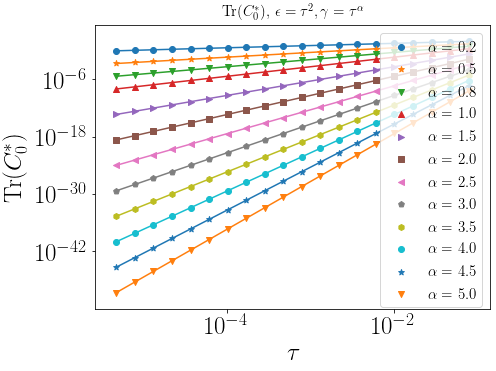

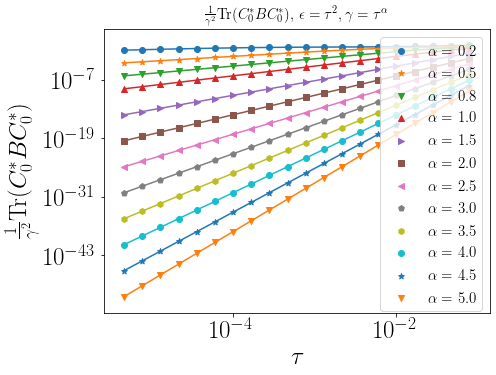

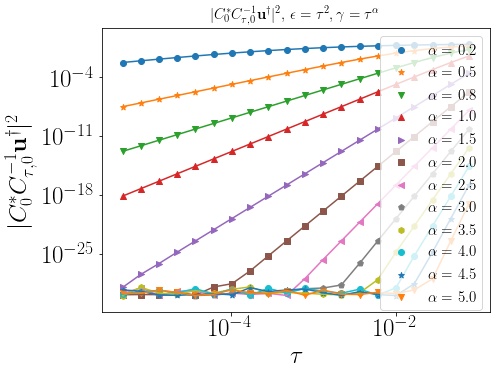

In [123]:
syn_plot_data(T, TRC, ALPHAS, param_str, title_= r'$\mathrm{Tr}(C_0^*)$', \
          val_str='TRC', save=_save, Jval=-1)
syn_plot_data(T, TRCBC, ALPHAS, param_str, title_= r'$\frac{1}{\gamma^2}\mathrm{Tr}(C_0^*BC_0^*)$', \
          val_str='TRCBC', save=_save, Jval=-1)
syn_plot_data(T, BIAS, ALPHAS, param_str, title_= r'$|C_0^*C_{\tau, 0}^{-1}\mathbf{u}^\dagger|^2$', \
          val_str='BIAS', save=_save, Jval=-1)

20
Line fitting for TRC
The slope for alpha = 0.2 is : 0.4699
The slope for alpha = 0.5 is : 0.9983
The slope for alpha = 0.8 is : 1.5000
The slope for alpha = 1.0 is : 2.0000
The slope for alpha = 1.5 is : 3.0000
The slope for alpha = 2.0 is : 4.0000
The slope for alpha = 2.5 is : 5.0000
The slope for alpha = 3.0 is : 6.0000
The slope for alpha = 3.5 is : 7.0000
The slope for alpha = 4.0 is : 8.0000
The slope for alpha = 4.5 is : 9.0000
The slope for alpha = 5.0 is : 10.0000
Saving figure at ./figures/BPCpaper/rand_1_Ns_100_100_100_fs_5_L_n_zero_TRC.png


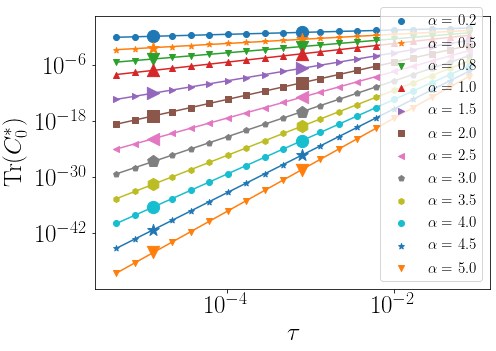

Line fitting for TRCBC
The slope for alpha = 0.2 is : 0.2475
The slope for alpha = 0.5 is : 0.9885
The slope for alpha = 0.8 is : 1.4997
The slope for alpha = 1.0 is : 2.0000
The slope for alpha = 1.5 is : 3.0000
The slope for alpha = 2.0 is : 4.0000
The slope for alpha = 2.5 is : 5.0000
The slope for alpha = 3.0 is : 6.0000
The slope for alpha = 3.5 is : 7.0000
The slope for alpha = 4.0 is : 8.0000
The slope for alpha = 4.5 is : 9.0000
The slope for alpha = 5.0 is : 10.0000
Saving figure at ./figures/BPCpaper/rand_1_Ns_100_100_100_fs_5_L_n_zero_TRCBC.png


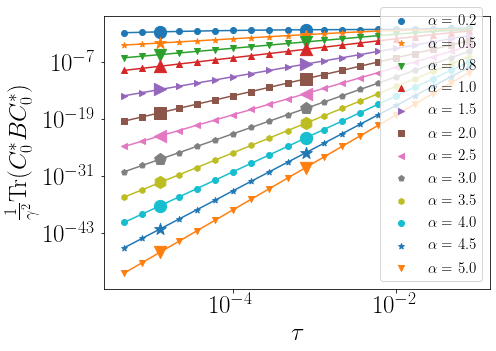

Line fitting for BIAS
The slope for alpha = 0.2 is : 0.6493
The slope for alpha = 0.5 is : 1.9596
The slope for alpha = 0.8 is : 2.9972
The slope for alpha = 1.0 is : 3.9963
The slope for alpha = 1.5 is : 5.9973
The slope for alpha = 2.0 is : 7.9988
The slope for alpha = 2.5 is : 9.9982
The slope for alpha = 3.0 is : 11.9849
The slope for alpha = 3.5 is : 13.9824
The slope for alpha = 4.0 is : 15.9798
The slope for alpha = 4.5 is : 17.9797
The slope for alpha = 5.0 is : 20.1703
Saving figure at ./figures/BPCpaper/rand_1_Ns_100_100_100_fs_5_L_n_zero_BIAS.png


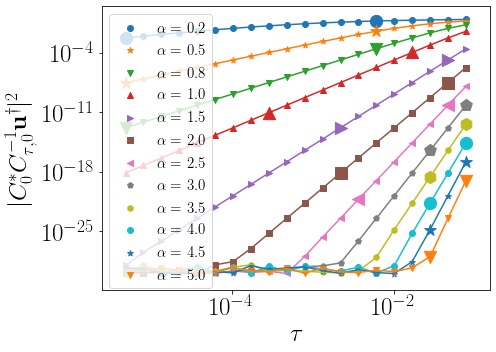

In [124]:
nt = len(T)
print(nt)
t_ranges = [(9,nt-2), (9,nt-2),(9,nt-2), (9,nt-2), (9,nt-2),(9,nt-2), (9,nt-2)] + (len(ALPHAS)-7)*[(9,nt-2)]
_save=True
rms=150

syn_plot_data_range(T, TRC, ALPHAS, param_str, t_ranges=t_ranges, title_= r'$\mathrm{Tr}(C_0^*)$', \
          val_str='TRC', save=_save, little_oh=little_oh, zero=True,_rms=rms)
syn_plot_data_range(T, TRCBC, ALPHAS, param_str, t_ranges=t_ranges, title_= r'$\frac{1}{\gamma^2}\mathrm{Tr}(C_0^*BC_0^*)$', \
          val_str='TRCBC', save=_save,little_oh=little_oh, zero=True,_rms=rms)
t_ranges = [(5,nt), (5,nt),(5,nt), (3,12), (1,8), (1,8), (1,7)] + (len(ALPHAS)-7)*[(0,3)]
syn_plot_data_range(T, BIAS, ALPHAS, param_str, t_ranges=t_ranges, title_= r'$|C_0^*C_{\tau, 0}^{-1}\mathbf{u}^\dagger|^2$', \
          val_str='BIAS', save=_save, little_oh=little_oh, zero=True,_rms=rms, _loc='upper left')

np.savez('./figures/BPCpaper/%s_data'%param_str, T=T, ALPHAS=ALPHAS, TRC=TRC, TRCBC=TRCBC, BIAS=BIAS)

### Observations

The slope in the BIAS plots do follow the expected curve of $\tau^{4\alpha}$.

# Load Previous Calculated Data 

Edit the plots for previous calculated data. 

Input in the variable ``old_data_filename`` the filepath to the folder that contains the ``.npz`` files containing the previously computed data. We will overwrite the plots contained in this same file location when we save the new plots generated.



In [ ]:
old_data_filename = './figures/BPCpaper/'

## Regime 1 - Big Oh

In [ ]:
little_oh = False

param_str = 'rand_1_Ns_100_100_100_fs_5_L_n_lo_0'
r1_data = np.load(old_data_filename + param_str+'_data.npz')
T = r1_data['T']
ALPHAS = r1_data['ALPHAS']
TRC = r1_data['TRC']
TRCBC = r1_data['TRCBC']
BIAS = r1_data['BIAS']

In [ ]:
nt = len(T)
t_ranges = len(ALPHAS)*[(9,nt-2)]
_save=True
rms=150

syn_plot_data_range(T, TRC, ALPHAS, param_str, t_ranges=t_ranges, title_= r'$\mathrm{Tr}(C_\epsilon^*)$', \
          val_str='TRC', save=_save, little_oh=little_oh, _rms=rms, file2save=old_data_filename)
syn_plot_data_range(T, TRCBC, ALPHAS, param_str, t_ranges=t_ranges, title_= r'$\frac{1}{\gamma^2}\mathrm{Tr}(C_\epsilon^*BC_\epsilon^*)$', \
          val_str='TRCBC', save=_save,little_oh=little_oh, _rms=rms, file2save=old_data_filename)

t_ranges = [(9,nt), (9,nt),(9,nt), (13,nt), (13,nt), (13,nt), (13,nt)]
syn_plot_data_range(T, BIAS, ALPHAS, param_str, t_ranges=t_ranges, title_= r'$|C_\epsilon^*C_{\tau, \epsilon}^{-1}\mathbf{u}^\dagger|^2$', \
          val_str='BIAS', save=_save, little_oh=little_oh, _rms=rms, file2save=old_data_filename)

## Regime 2 - Little Oh

In [ ]:
little_oh = True

param_str = 'rand_1_Ns_100_100_100_fs_5_L_n_lo_1'
r2_data = np.load(old_data_filename + param_str+'_data.npz')
T = r2_data['T']
ALPHAS = r2_data['ALPHAS']
TRC = r2_data['TRC']
TRCBC = r2_data['TRCBC']
BIAS = r2_data['BIAS']

In [ ]:
nt = len(T)
print(nt)
t_ranges = [(9,nt), (9,nt),(9,nt), (8,16), (8,16), (8,16), (8,16)]
_save=True
rms=150

syn_plot_data_range(T, TRC, ALPHAS, param_str, t_ranges=t_ranges, title_= r'$\mathrm{Tr}(C_\epsilon^*)$', \
          val_str='TRC', save=_save, little_oh=little_oh,_rms=rms, file2save=old_data_filename)
syn_plot_data_range(T, TRCBC, ALPHAS, param_str, t_ranges=t_ranges, title_= r'$\frac{1}{\gamma^2}\mathrm{Tr}(C_\epsilon^*BC_\epsilon^*)$', \
          val_str='TRCBC', save=_save, little_oh=little_oh,_rms=rms, file2save=old_data_filename)
syn_plot_data_range(T, BIAS, ALPHAS, param_str, t_ranges=t_ranges, title_= r'$|C_\epsilon^*C_{\tau, \epsilon}^{-1}\mathbf{u}^\dagger|^2$', \
          val_str='BIAS', save=_save, little_oh=little_oh,_rms=rms, file2save=old_data_filename)

## Regime 3 - $\epsilon = 0$

In [121]:
little_oh = False
zero=True

param_str = 'rand_0_Ns_100_100_100_fs_5_L_n_zero'
r3_data = np.load(old_data_filename + param_str+'_data.npz')
T = r3_data['T']
ALPHAS = r3_data['ALPHAS']
TRC = r3_data['TRC']
TRCBC = r3_data['TRCBC']
BIAS = r3_data['BIAS']

FileNotFoundError: [Errno 2] No such file or directory: './figures/BPCpaper/rand_0_Ns_100_100_100_fs_5_L_n_zero_data.npz'

In [ ]:
nt = len(T)
t_ranges = [(9,nt-2), (9,nt-2),(9,nt-2), (9,nt-2), (9,nt-2),(9,nt-2), (9,nt-2)]
_save=True
rms=150

syn_plot_data_range(T, TRC, ALPHAS, param_str, t_ranges=t_ranges, title_= r'$\mathrm{Tr}(C_0^*)$', \
          val_str='TRC', save=_save, little_oh=little_oh, zero=True,_rms=rms, file2save=old_data_filename)
syn_plot_data_range(T, TRCBC, ALPHAS, param_str, t_ranges=t_ranges, title_= r'$\frac{1}{\gamma^2}\mathrm{Tr}(C_0^*BC_0^*)$', \
          val_str='TRCBC', save=_save,little_oh=little_oh, zero=True,_rms=rms, file2save=old_data_filename)
t_ranges = [(5,nt), (5,nt),(5,nt), (3,12), (1,8), (1,8), (1,7)]
syn_plot_data_range(T, BIAS, ALPHAS, param_str, t_ranges=t_ranges, title_= r'$|C_0^*C_{\tau, 0}^{-1}\mathbf{u}^\dagger|^2$', \
          val_str='BIAS', save=_save, little_oh=little_oh, zero=True,_rms=rms, _loc='upper left', file2save=old_data_filename)

# $\alpha$ Plot

In [8]:
old_data_filename = './figures/BPCpaper/'
nt = len(T)

findfont: Font family ['FreeSerif'] not found. Falling back to DejaVu Sans.


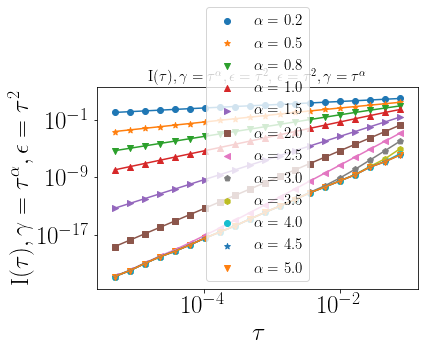

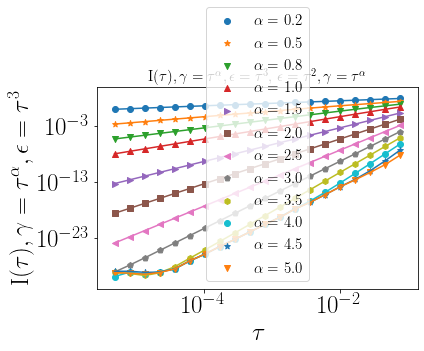

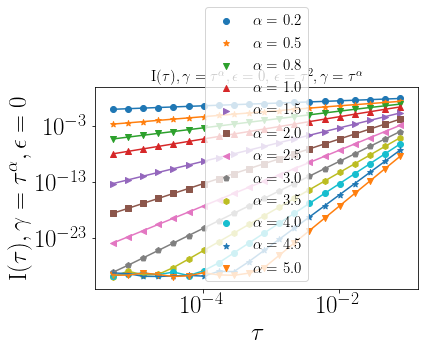

[0.25 0.5  0.75 1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.  ]
[(16, 20), (16, 20), (16, 20), (16, 20), (16, 20), (16, 20), (16, 20), (16, 20), (16, 20), (16, 20), (16, 20), (16, 20)]
[(13, 17), (13, 17), (13, 17), (13, 17), (13, 17), (13, 17), (13, 17), (13, 17), (13, 17), (11, 16), (11, 16), (11, 16)]
[(14, 18), (14, 18), (14, 18), (14, 18), (14, 18), (14, 18), (14, 18), (1, 8), (1, 8), (1, 8), (1, 8), (1, 8), (1, 8), (1, 8)]
[1.99954215 1.99999849 2.         2.         2.00000511 1.6978755
 1.37914598 1.18201576 1.03412706 0.91918025 0.82709541]
[1.99840809 1.99998778 1.9999999  2.         2.         2.
 1.99997812 1.77138176 1.48446576 1.31712006 1.18450569]
[1.88085625 1.99904346 1.99999432 1.99999996 2.         2.
 2.         1.99956853 1.99956785 1.99956709 1.99956626 1.9995653 ]


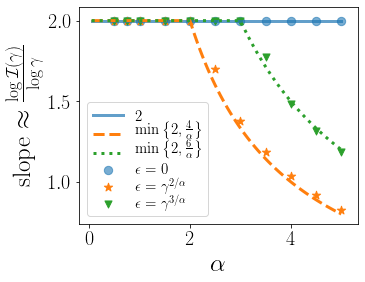

In [9]:
DATA = {}
_save = False

param_str = 'rand_1_Ns_100_100_100_fs_5_L_n_lo_0'
r1_data = np.load(old_data_filename + param_str+'_data.npz')
T = r1_data['T']
ALPHAS = r1_data['ALPHAS']
TRC = r1_data['TRC']
TRCBC = r1_data['TRCBC']
BIAS = r1_data['BIAS']
DATA[0] = TRC + TRCBC + BIAS
syn_plot_data(T, DATA[0], ALPHAS, param_str, title_= r'$\mathrm{I}(\tau), \gamma=\tau^\alpha, \epsilon=\tau^{2}$', \
          val_str='I', save=_save, Jval=-1)

param_str = 'rand_1_Ns_100_100_100_fs_5_L_n_lo_1'
r2_data = np.load(old_data_filename + param_str+'_data.npz')
ALPHAS = r2_data['ALPHAS']
TRC = r2_data['TRC']
TRCBC = r2_data['TRCBC']
BIAS = r2_data['BIAS']
DATA[1] = TRC + TRCBC + BIAS
syn_plot_data(T, DATA[1], ALPHAS, param_str, title_= r'$\mathrm{I}(\tau), \gamma=\tau^\alpha, \epsilon=\tau^{3}$', \
          val_str='I', save=_save, Jval=-1)

param_str = 'rand_1_Ns_100_100_100_fs_5_L_n_zero'
r3_data = np.load(old_data_filename + param_str+'_data.npz')
ALPHAS = r3_data['ALPHAS']
TRC = r3_data['TRC']
TRCBC = r3_data['TRCBC']
BIAS = r3_data['BIAS']
DATA[2] = TRC + TRCBC + BIAS
syn_plot_data(T, DATA[2], ALPHAS, param_str, title_= r'$\mathrm{I}(\tau), \gamma=\tau^\alpha, \epsilon=0$', \
          val_str='I', save=_save, Jval=-1)

print(ALPHAS)

LS = {}
n_alpha = len(ALPHAS)
TRANGES = [n_alpha*[(16,len(T))], 9*[(13,17)] + (len(ALPHAS)-9)*[(11,16)], int(n_alpha/2+1)*[(14,len(T)-2)] + int(n_alpha/2+1)*[(1,8)] ]
for r in [0,1,2]:
    line_stats = np.zeros((n_alpha,2))
    data = DATA[r]
    t_ranges = TRANGES[r]
    print(t_ranges)
    
    for i in range(n_alpha):
        j_start, j_end = t_ranges[i]
        t = np.log(T[j_start:j_end])
        A = np.array([t, np.ones(len(t))]).T
        b = np.log(data[i,j_start:j_end])
        res = lsq_linear(A, b)
        line_stats[i,:] = res.x
        #print('The slope for alpha = %1.1f is : %2.4f' % (ALPHAS[i], res.x[0]))
        #file_string += '%1.1f, %2.4f\n' % (ALPHAS[i], res.x[0])
    LS[r] = line_stats[:,0].flatten()
    
    #syn_plot_data_range(T, data, ALPHAS, param_str, t_ranges=t_ranges, title_= r'$|C_0^*C_{\tau, 0}^{-1}\mathbf{u}^\dagger|^2$', \
    #     val_str='BIAS', save=_save, little_oh=little_oh, zero=True,_rms=rms, _loc='upper left', file2save=old_data_filename)
    
'''
alpha = np.linspace(0.,5.,101)
BETAS = [2.,3.]
for r in [0,1]:
    f = 2.*alpha
    f[np.where(alpha >= BETAS[r])]  = 2.*BETAS[r]
    plt.plot(alpha, f, label=r'$\beta =$ %1.1f'% BETAS[r])
    plt.scatter(ALPHAS, LS[r])
f = 2*alpha
plt.plot(alpha, f, label=r'$\beta = \infty$')
plt.scatter(ALPHAS, LS[2])
plt.legend(fontsize=15)
plt.title(r'Convergence Rate, $\gamma=\tau^\alpha, \epsilon=\tau^\beta$', fontsize=20)
plt.xlabel(r'$\alpha$', fontsize=20)
plt.ylabel(r'slope $\approx\frac{\log\mathcal{I}(\tau)}{\log \tau}$', fontsize=20)
plt.savefig('cr_tau.png')
plt.show()
'''
markers = ['o','*', 'v', '^', '>', 's', '<', 'p', 'h', 'o','*', 'v', '^', '>', 's', '<', 'p' ]
alpha = np.linspace(0.,5.,101)
BETAS = [2.,3.]
f = len(alpha)*[2.]

fig = plt.figure(figsize=[5,4])
ax = fig.gca()
    
plt.plot(alpha[1:], f[1:], label=r'$2$', linewidth=3, alpha=0.7)
plt.scatter(ALPHAS[1:], LS[2][1:]/ALPHAS[1:], marker='o', s=70, alpha=0.6,
           label=r'$\epsilon = 0$')
linestyles = ['--',':']
for r in [0,1]:
    f = 2.*alpha
    f[np.where(alpha >= BETAS[r])]  = 2.*BETAS[r]
    plt.plot(alpha[1:], f[1:]/alpha[1:], label=r'$\min\left\{2, \frac{%1.0f}{\alpha}\right\}$'%(2 * BETAS[r]), 
             linewidth=3, linestyle=linestyles[r], alpha=1.0)
    plt.scatter(ALPHAS[1:], LS[r][1:]/ALPHAS[1:], marker=markers[r+1], s=150 / BETAS[r], 
               label=r'$\epsilon = \gamma^{%d/\alpha}$'%BETAS[r])
    print(LS[r][1:]/ALPHAS[1:])

print(LS[2]/ALPHAS)
plt.legend(fontsize=15, labelspacing=0.05)
#plt.title(r'Convergence Rate, $\tau = \gamma^{1/\alpha}, \epsilon=\gamma^{\beta/\alpha}$', fontsize=25)
plt.xlabel(r'$\alpha$', fontsize=25)
plt.ylabel(r'slope $\approx\frac{\log\mathcal{I}(\gamma)}{\log \gamma}$', fontsize=25)
ax.tick_params(axis='both', which='major', labelsize=20)
#plt.ylim(0,2.5)
plt.savefig('cr_gamma.png')
plt.show()

[0.25 0.5  0.75 1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.  ]
[(12, 20), (12, 20), (12, 20), (12, 20), (12, 20), (12, 20), (12, 20), (12, 20), (12, 20), (12, 20), (12, 20), (12, 20)]
[(9, 20), (9, 20), (9, 20), (8, 16), (8, 16), (8, 16), (8, 16), (8, 16), (8, 16), (8, 16), (8, 16), (8, 16)]
[(9, 18), (9, 18), (9, 18), (9, 18), (9, 18), (9, 18), (9, 18), (9, 18), (9, 18), (9, 18), (9, 18), (9, 18)]
[1.99843791 1.99998212 1.99999977 1.99999999 1.99999999 1.99999999
 1.99999999 1.99999999 1.99999999 1.99999999 1.99999999]
[1.99743838 1.99995725 1.99999581 1.99999969 1.99999969 1.99999969
 1.99999969 1.99999969 1.99999969 1.99999969 1.99999969]
[1.8797794  1.99659111 1.99994058 1.99999877 1.99999991 1.99999991
 1.99999991 1.99999991 1.99999991 1.99999991 1.99999991 1.99999991]


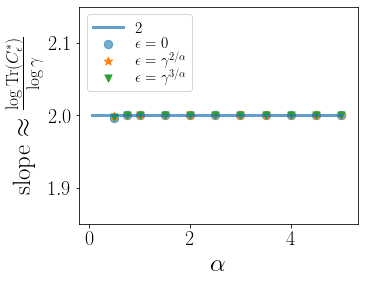

In [12]:
DATA = {}
_save = False

param_str = 'rand_1_Ns_100_100_100_fs_5_L_n_lo_0'
r1_data = np.load(old_data_filename + param_str+'_data.npz')
T = r1_data['T']
ALPHAS = r1_data['ALPHAS']
TRC = r1_data['TRC']
TRCBC = r1_data['TRCBC']
BIAS = r1_data['BIAS']
DATA[0] = TRC #+ TRCBC + BIAS
#syn_plot_data(T, DATA[0], ALPHAS, param_str, title_= r'$\mathrm{I}(\tau), \gamma=\tau^\alpha, \epsilon=\tau^{2}$', \
#          val_str='I', save=_save, Jval=-1)

param_str = 'rand_1_Ns_100_100_100_fs_5_L_n_lo_1'
r2_data = np.load(old_data_filename + param_str+'_data.npz')
ALPHAS = r2_data['ALPHAS']
TRC = r2_data['TRC']
TRCBC = r2_data['TRCBC']
BIAS = r2_data['BIAS']
DATA[1] = TRC #+ TRCBC + BIAS
#syn_plot_data(T, DATA[1], ALPHAS, param_str, title_= r'$\mathrm{I}(\tau), \gamma=\tau^\alpha, \epsilon=\tau^{3}$', \
#          val_str='I', save=_save, Jval=-1)

param_str = 'rand_1_Ns_100_100_100_fs_5_L_n_zero'
r3_data = np.load(old_data_filename + param_str+'_data.npz')
ALPHAS = r3_data['ALPHAS']
TRC = r3_data['TRC']
TRCBC = r3_data['TRCBC']
BIAS = r3_data['BIAS']
DATA[2] = TRC #+ TRCBC + BIAS
#syn_plot_data(T, DATA[2], ALPHAS, param_str, title_= r'$\mathrm{I}(\tau), \gamma=\tau^\alpha, \epsilon=0$', \
#          val_str='I', save=_save, Jval=-1)

print(ALPHAS)

LS = {}
n_alpha = len(ALPHAS)
#TRANGES = [n_alpha*[(16,len(T))], 9*[(13,17)] + (len(ALPHAS)-9)*[(11,16)], int(n_alpha/2+1)*[(14,len(T)-2)] + int(n_alpha/2+1)*[(1,8)] ]
TRANGES = []
TRANGES.append(len(ALPHAS)*[(12,len(T))])
TRANGES.append( [(9,nt), (9,nt),(9,nt), (8,16), (8,16), (8,16), (8,16)] + (len(ALPHAS) - 7)*[(8,16)])
TRANGES.append([(9,nt-2), (9,nt-2),(9,nt-2), (9,nt-2), (9,nt-2),(9,nt-2), (9,nt-2)] + (len(ALPHAS)-7)*[(9,nt-2)])
for r in [0,1,2]:
    line_stats = np.zeros((n_alpha,2))
    data = DATA[r]
    t_ranges = TRANGES[r]
    print(t_ranges)
    
    for i in range(n_alpha):
        j_start, j_end = t_ranges[i]
        t = np.log(T[j_start:j_end])
        A = np.array([t, np.ones(len(t))]).T
        b = np.log(data[i,j_start:j_end])
        res = lsq_linear(A, b)
        line_stats[i,:] = res.x
        #print('The slope for alpha = %1.1f is : %2.4f' % (ALPHAS[i], res.x[0]))
        #file_string += '%1.1f, %2.4f\n' % (ALPHAS[i], res.x[0])
    LS[r] = line_stats[:,0].flatten()
    
    #syn_plot_data_range(T, data, ALPHAS, param_str, t_ranges=t_ranges, title_= r'$|C_0^*C_{\tau, 0}^{-1}\mathbf{u}^\dagger|^2$', \
    #     val_str='BIAS', save=_save, little_oh=little_oh, zero=True,_rms=rms, _loc='upper left', file2save=old_data_filename)
    
'''
alpha = np.linspace(0.,5.,101)
BETAS = [2.,3.]
for r in [0,1]:
    f = 2.*alpha
    f[np.where(alpha >= BETAS[r])]  = 2.*BETAS[r]
    plt.plot(alpha, f, label=r'$\beta =$ %1.1f'% BETAS[r])
    plt.scatter(ALPHAS, LS[r])
f = 2*alpha
plt.plot(alpha, f, label=r'$\beta = \infty$')
plt.scatter(ALPHAS, LS[2])
plt.legend(fontsize=15)
plt.title(r'Convergence Rate, $\gamma=\tau^\alpha, \epsilon=\tau^\beta$', fontsize=20)
plt.xlabel(r'$\alpha$', fontsize=20)
plt.ylabel(r'slope $\approx\frac{\log\mathcal{I}(\tau)}{\log \tau}$', fontsize=20)
plt.savefig('cr_tau.png')
plt.show()
'''
markers = ['o','*', 'v', '^', '>', 's', '<', 'p', 'h', 'o','*', 'v', '^', '>', 's', '<', 'p' ]
alpha = np.linspace(0.,5.,101)
BETAS = [2.,3.]
f = len(alpha)*[2.]

fig = plt.figure(figsize=[5,4])
ax = fig.gca()
    
plt.plot(alpha[1:], f[1:], label=r'$2$', linewidth=3, alpha=0.7)
plt.scatter(ALPHAS[1:], LS[2][1:]/ALPHAS[1:], marker='o', s=70, alpha=0.6,
           label=r'$\epsilon = 0$')
linestyles = ['--',':']

for r in [0,1]:
    f = 2.*alpha
    #f[np.where(alpha >= BETAS[r])]  = 2.*BETAS[r]
    #plt.plot(alpha[1:], f[1:]/alpha[1:], label=r'$\min\left\{2, \frac{%1.0f}{\alpha}\right\}$'%(2 * BETAS[r]), 
    #         linewidth=3, linestyle=linestyles[r], alpha=1.0)
    plt.scatter(ALPHAS[1:], LS[r][1:]/ALPHAS[1:], marker=markers[r+1], s=150 / BETAS[r], 
               label=r'$\epsilon = \gamma^{%d/\alpha}$'%BETAS[r])
    print(LS[r][1:]/ALPHAS[1:])

print(LS[2]/ALPHAS)
plt.legend(fontsize=15, loc='upper left', labelspacing=0.05)
#plt.title(r'Convergence Rate, $\tau = \gamma^{1/\alpha}, \epsilon=\gamma^{\beta/\alpha}$', fontsize=25)
plt.xlabel(r'$\alpha$', fontsize=25)
plt.ylabel(r'slope $\approx\frac{\log\mathrm{Tr}(C_\epsilon^\ast)}{\log \gamma}$', fontsize=25)
ax.tick_params(axis='both', which='major', labelsize=20)
plt.ylim(1.85,2.15)
plt.savefig('trc_gamma.png')
plt.show()

[0.25 0.5  0.75 1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.  ]
[(16, 20), (16, 20), (16, 20), (16, 20), (16, 20), (16, 20), (16, 20), (16, 20), (16, 20), (16, 20), (16, 20), (16, 20)]
[(13, 17), (13, 17), (13, 17), (13, 17), (13, 17), (13, 17), (13, 17), (13, 17), (13, 17), (11, 16), (11, 16), (11, 16)]
[(14, 18), (14, 18), (14, 18), (14, 18), (14, 18), (14, 18), (14, 18), (1, 8), (1, 8), (1, 8), (1, 8), (1, 8), (1, 8), (1, 8)]
[1.99715905 1.99998597 1.99999993 2.         2.         2.
 2.         2.         2.         2.         2.        ]
[1.99267014 1.99994389 1.99999956 2.         2.         2.
 2.         2.         2.         2.         2.        ]
[1.37580785 1.99559832 1.99997393 1.99999984 2.         2.
 2.         1.99997001 1.9999696  1.99996909 1.99996852 1.9999679 ]


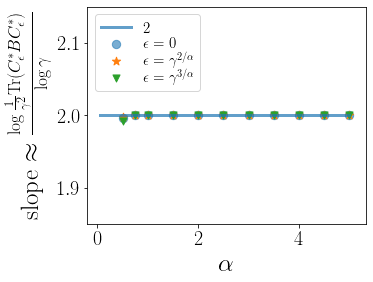

In [13]:
DATA = {}
_save = False

param_str = 'rand_1_Ns_100_100_100_fs_5_L_n_lo_0'
r1_data = np.load(old_data_filename + param_str+'_data.npz')
T = r1_data['T']
ALPHAS = r1_data['ALPHAS']
TRC = r1_data['TRC']
TRCBC = r1_data['TRCBC']
BIAS = r1_data['BIAS']
DATA[0] =  TRCBC #+ BIAS
#syn_plot_data(T, DATA[0], ALPHAS, param_str, title_= r'$\mathrm{I}(\tau), \gamma=\tau^\alpha, \epsilon=\tau^{2}$', \
#          val_str='I', save=_save, Jval=-1)

param_str = 'rand_1_Ns_100_100_100_fs_5_L_n_lo_1'
r2_data = np.load(old_data_filename + param_str+'_data.npz')
ALPHAS = r2_data['ALPHAS']
TRC = r2_data['TRC']
TRCBC = r2_data['TRCBC']
BIAS = r2_data['BIAS']
DATA[1] = TRCBC #+ BIAS
#syn_plot_data(T, DATA[1], ALPHAS, param_str, title_= r'$\mathrm{I}(\tau), \gamma=\tau^\alpha, \epsilon=\tau^{3}$', \
#          val_str='I', save=_save, Jval=-1)

param_str = 'rand_1_Ns_100_100_100_fs_5_L_n_zero'
r3_data = np.load(old_data_filename + param_str+'_data.npz')
ALPHAS = r3_data['ALPHAS']
TRC = r3_data['TRC']
TRCBC = r3_data['TRCBC']
BIAS = r3_data['BIAS']
DATA[2] = TRCBC #+ BIAS
#syn_plot_data(T, DATA[2], ALPHAS, param_str, title_= r'$\mathrm{I}(\tau), \gamma=\tau^\alpha, \epsilon=0$', \
#          val_str='I', save=_save, Jval=-1)

print(ALPHAS)

LS = {}
n_alpha = len(ALPHAS)
TRANGES = [n_alpha*[(16,len(T))], 9*[(13,17)] + (len(ALPHAS)-9)*[(11,16)], int(n_alpha/2+1)*[(14,len(T)-2)] + int(n_alpha/2+1)*[(1,8)] ]
for r in [0,1,2]:
    line_stats = np.zeros((n_alpha,2))
    data = DATA[r]
    t_ranges = TRANGES[r]
    print(t_ranges)
    
    for i in range(n_alpha):
        j_start, j_end = t_ranges[i]
        t = np.log(T[j_start:j_end])
        A = np.array([t, np.ones(len(t))]).T
        b = np.log(data[i,j_start:j_end])
        res = lsq_linear(A, b)
        line_stats[i,:] = res.x
        #print('The slope for alpha = %1.1f is : %2.4f' % (ALPHAS[i], res.x[0]))
        #file_string += '%1.1f, %2.4f\n' % (ALPHAS[i], res.x[0])
    LS[r] = line_stats[:,0].flatten()
    
    #syn_plot_data_range(T, data, ALPHAS, param_str, t_ranges=t_ranges, title_= r'$|C_0^*C_{\tau, 0}^{-1}\mathbf{u}^\dagger|^2$', \
    #     val_str='BIAS', save=_save, little_oh=little_oh, zero=True,_rms=rms, _loc='upper left', file2save=old_data_filename)
    
'''
alpha = np.linspace(0.,5.,101)
BETAS = [2.,3.]
for r in [0,1]:
    f = 2.*alpha
    f[np.where(alpha >= BETAS[r])]  = 2.*BETAS[r]
    plt.plot(alpha, f, label=r'$\beta =$ %1.1f'% BETAS[r])
    plt.scatter(ALPHAS, LS[r])
f = 2*alpha
plt.plot(alpha, f, label=r'$\beta = \infty$')
plt.scatter(ALPHAS, LS[2])
plt.legend(fontsize=15)
plt.title(r'Convergence Rate, $\gamma=\tau^\alpha, \epsilon=\tau^\beta$', fontsize=20)
plt.xlabel(r'$\alpha$', fontsize=20)
plt.ylabel(r'slope $\approx\frac{\log\mathcal{I}(\tau)}{\log \tau}$', fontsize=20)
plt.savefig('cr_tau.png')
plt.show()
'''
markers = ['o','*', 'v', '^', '>', 's', '<', 'p', 'h', 'o','*', 'v', '^', '>', 's', '<', 'p' ]
alpha = np.linspace(0.,5.,101)
BETAS = [2.,3.]
f = len(alpha)*[2.]

fig = plt.figure(figsize=[5,4])
ax = fig.gca()
    
plt.plot(alpha[1:], f[1:], label=r'$2$', linewidth=3, alpha=0.7)
plt.scatter(ALPHAS[1:], LS[2][1:]/ALPHAS[1:], marker='o', s=70, alpha=0.6,
           label=r'$\epsilon = 0$')
linestyles = ['--',':']

for r in [0,1]:
    f = 2.*alpha
    #f[np.where(alpha >= BETAS[r])]  = 2.*BETAS[r]
    #plt.plot(alpha[1:], f[1:]/alpha[1:], label=r'$\min\left\{2, \frac{%1.0f}{\alpha}\right\}$'%(2 * BETAS[r]), 
    #         linewidth=3, linestyle=linestyles[r], alpha=1.0)
    plt.scatter(ALPHAS[1:], LS[r][1:]/ALPHAS[1:], marker=markers[r+1], s=150 / BETAS[r], 
               label=r'$\epsilon = \gamma^{%d/\alpha}$'%BETAS[r])
    print(LS[r][1:]/ALPHAS[1:])

print(LS[2]/ALPHAS)
plt.legend(fontsize=15, loc='upper left', labelspacing=0.05)
#plt.title(r'Convergence Rate, $\tau = \gamma^{1/\alpha}, \epsilon=\gamma^{\beta/\alpha}$', fontsize=25)
plt.xlabel(r'$\alpha$', fontsize=25)
plt.ylabel(r'slope $\approx\frac{\log\frac{1}{\gamma^2}\mathrm{Tr}(C_\epsilon^\ast BC_\epsilon^\ast)}{\log \gamma}$', fontsize=25)
ax.tick_params(axis='both', which='major', labelsize=20)
plt.ylim(1.85,2.15)
plt.savefig('trcbc_gamma.png')
plt.show()

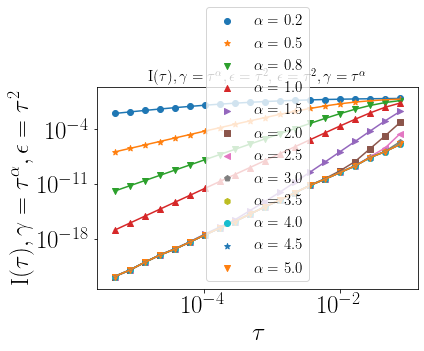

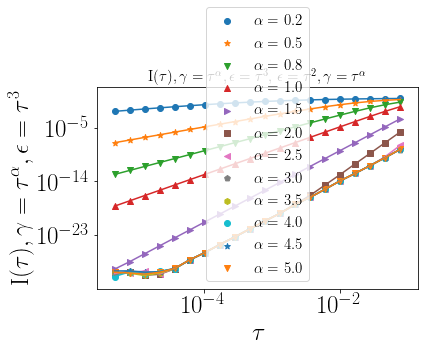

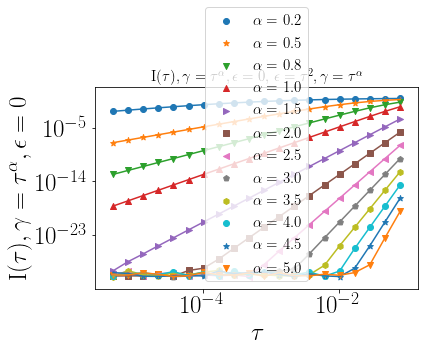

[0.25 0.5  0.75 1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.  ]
[(12, 20), (12, 20), (12, 20), (12, 20), (12, 20), (12, 20), (12, 20), (12, 20), (12, 20), (12, 20), (12, 20), (12, 20)]
[(9, 20), (9, 20), (9, 20), (8, 16), (8, 16), (8, 16), (8, 16), (8, 16), (8, 16), (8, 16), (8, 16), (8, 16)]
[(5, 20), (5, 20), (5, 20), (3, 12), (1, 8), (1, 8), (1, 7), (0, 3), (0, 3), (0, 3), (0, 3), (0, 3)]
[3.98716817 4.00023036 4.00039217 2.71229915 1.99307461 1.59446937
 1.32874933 1.13895619 0.99660751 0.88591081 0.79731679]
[3.98182569 3.99975611 4.00008433 4.00007314 2.97413613 2.37428741
 1.98402037 1.70211731 1.48372494 1.31792287 1.18549176]
[2.59707629 3.91917608 3.99625056 3.99626569 3.99820491 3.9993909
 3.99927877 3.99496805 3.99496915 3.99493835 3.99549113 4.03405726]


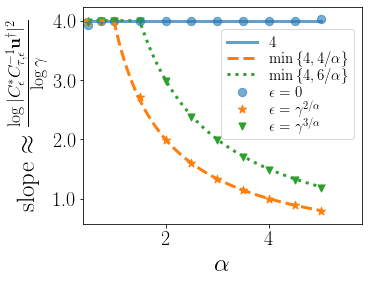

In [17]:
DATA = {}
_save = False

param_str = 'rand_1_Ns_100_100_100_fs_5_L_n_lo_0'
r1_data = np.load(old_data_filename + param_str+'_data.npz')
T = r1_data['T']
ALPHAS = r1_data['ALPHAS']
TRC = r1_data['TRC']
TRCBC = r1_data['TRCBC']
BIAS = r1_data['BIAS']
DATA[0] = BIAS
syn_plot_data(T, DATA[0], ALPHAS, param_str, title_= r'$\mathrm{I}(\tau), \gamma=\tau^\alpha, \epsilon=\tau^{2}$', \
          val_str='I', save=_save, Jval=-1)

param_str = 'rand_1_Ns_100_100_100_fs_5_L_n_lo_1'
r2_data = np.load(old_data_filename + param_str+'_data.npz')
ALPHAS = r2_data['ALPHAS']
TRC = r2_data['TRC']
TRCBC = r2_data['TRCBC']
BIAS = r2_data['BIAS']
DATA[1] = BIAS
syn_plot_data(T, DATA[1], ALPHAS, param_str, title_= r'$\mathrm{I}(\tau), \gamma=\tau^\alpha, \epsilon=\tau^{3}$', \
          val_str='I', save=_save, Jval=-1)

param_str = 'rand_1_Ns_100_100_100_fs_5_L_n_zero'
r3_data = np.load(old_data_filename + param_str+'_data.npz')
ALPHAS = r3_data['ALPHAS']
TRC = r3_data['TRC']
TRCBC = r3_data['TRCBC']
BIAS = r3_data['BIAS']
DATA[2] = BIAS
syn_plot_data(T, DATA[2], ALPHAS, param_str, title_= r'$\mathrm{I}(\tau), \gamma=\tau^\alpha, \epsilon=0$', \
          val_str='I', save=_save, Jval=-1)

print(ALPHAS)

LS = {}
n_alpha = len(ALPHAS)
# TRANGES = [n_alpha*[(16,len(T))], 9*[(13,17)] + (len(ALPHAS)-9)*[(11,16)], int(n_alpha/2+1)*[(14,len(T)-2)] + int(n_alpha/2+1)*[(1,8)] ]
TRANGES = []
TRANGES.append(len(ALPHAS)*[(12,len(T))])
TRANGES.append([(9,nt), (9,nt),(9,nt), (8,16), (8,16), (8,16), (8,16)] + (len(ALPHAS) - 7)*[(8,16)])
TRANGES.append([(5,nt), (5,nt),(5,nt), (3,12), (1,8), (1,8), (1,7)] + (len(ALPHAS)-7)*[(0,3)])

for r in [0,1,2]:
    line_stats = np.zeros((n_alpha,2))
    data = DATA[r]
    t_ranges = TRANGES[r]
    print(t_ranges)
    
    for i in range(n_alpha):
        j_start, j_end = t_ranges[i]
        t = np.log(T[j_start:j_end])
        A = np.array([t, np.ones(len(t))]).T
        b = np.log(data[i,j_start:j_end])
        res = lsq_linear(A, b)
        line_stats[i,:] = res.x
        #print('The slope for alpha = %1.1f is : %2.4f' % (ALPHAS[i], res.x[0]))
        #file_string += '%1.1f, %2.4f\n' % (ALPHAS[i], res.x[0])
    LS[r] = line_stats[:,0].flatten()
    
    #syn_plot_data_range(T, data, ALPHAS, param_str, t_ranges=t_ranges, title_= r'$|C_0^*C_{\tau, 0}^{-1}\mathbf{u}^\dagger|^2$', \
    #     val_str='BIAS', save=_save, little_oh=little_oh, zero=True,_rms=rms, _loc='upper left', file2save=old_data_filename)
    
'''
alpha = np.linspace(0.,5.,101)
BETAS = [2.,3.]
for r in [0,1]:
    f = 2.*alpha
    f[np.where(alpha >= BETAS[r])]  = 2.*BETAS[r]
    plt.plot(alpha, f, label=r'$\beta =$ %1.1f'% BETAS[r])
    plt.scatter(ALPHAS, LS[r])
f = 2*alpha
plt.plot(alpha, f, label=r'$\beta = \infty$')
plt.scatter(ALPHAS, LS[2])
plt.legend(fontsize=15)
plt.title(r'Convergence Rate, $\gamma=\tau^\alpha, \epsilon=\tau^\beta$', fontsize=20)
plt.xlabel(r'$\alpha$', fontsize=20)
plt.ylabel(r'slope $\approx\frac{\log\mathcal{I}(\tau)}{\log \tau}$', fontsize=20)
plt.savefig('cr_tau.png')
plt.show()
'''
markers = ['o','*', 'v', '^', '>', 's', '<', 'p', 'h', 'o','*', 'v', '^', '>', 's', '<', 'p' ]
alpha = np.linspace(0.,5.,101)
BETAS = [2.,3.]
f = len(alpha)*[4.]

fig = plt.figure(figsize=[5,4])
ax = fig.gca()
    
plt.plot(alpha[1:], f[1:], label=r'$4$', linewidth=3, alpha=0.7)
plt.scatter(ALPHAS[1:], LS[2][1:]/ALPHAS[1:], marker='o', s=70, alpha=0.6,
           label=r'$\epsilon = 0$')
linestyles = ['--',':']
for r in [0,1]:
    f = 4.*alpha
    f[np.where(alpha >= BETAS[r]/2)]  = 2.*BETAS[r]
    plt.plot(alpha[1:], f[1:]/alpha[1:], label=r'$\min\left\{4, %1.0f/\alpha\right\}$'%(2 * BETAS[r]), 
             linewidth=3, linestyle=linestyles[r], alpha=1.0)
    plt.scatter(ALPHAS[1:], LS[r][1:]/ALPHAS[1:], marker=markers[r+1], s=150 / BETAS[r], 
               label=r'$\epsilon = \gamma^{%d/\alpha}$'%BETAS[r])
    print(LS[r][1:]/ALPHAS[1:])

print(LS[2]/ALPHAS)
plt.legend(fontsize=15, loc='upper right', bbox_to_anchor=(1.0, 0.93), labelspacing=0.05)
#plt.title(r'Convergence Rate, $\tau = \gamma^{1/\alpha}, \epsilon=\gamma^{\beta/\alpha}$', fontsize=25)
plt.xlabel(r'$\alpha$', fontsize=25)
plt.ylabel(r'slope $\approx\frac{\log|C_\epsilon^*C_{\tau, \epsilon}^{-1}\mathbf{u}^\dagger|^2}{\log \gamma}$', fontsize=25)
ax.tick_params(axis='both', which='major', labelsize=20)
yticks = ax.get_yticks()
ax.set_yticklabels(['%1.1f'%x for x in yticks])
#plt.ylim(0,2.5)
plt.xlim(0.4,5.8)
plt.savefig('bias_gamma.png')
plt.show()

In [126]:
print(LS)

{0: array([0.86190066, 1.99745404, 2.99851154, 3.99803105, 4.0083093 ,
       3.98971479, 3.98931707, 3.98928951, 3.98919764, 3.98939102,
       3.98914398, 3.98937109]), 1: array([0.79294637, 1.99615163, 2.99996551, 4.00001251, 5.99944644,
       5.58195225, 5.48245545, 4.99670344, 5.2978772 , 5.93620689,
       5.92703983, 5.92252844]), 2: array([ 0.8315214 ,  1.99767968,  2.99997146,  3.99998937,  6.04693162,
        1.07947646,  0.05378084, 11.96456566, 11.54763218,  8.7538708 ,
        6.13753392,  3.71020663])}


# Voting Records Code

In [ ]:
%autoreload

In [ ]:
sup_percent = 0.1
n = 10
T   = np.power(0.6, range(5, n+5))
ALPHAS = [0.5, 1, 1.5, 2, 2.5, 3.]
SIGMAS = [0.25*i for i in range(1, 10)]

TRC, TRCBC, BIAS = voting_run_test(SIGMAS, T, ALPHAS, rand=True, sup_percent=sup_percent, normalized=True)

In [ ]:
_save = False
param_str = 'VotingRecords'

for i,sigma in enumerate(SIGMAS):
    print("sigma = %1.3f" % sigma)
    voting_plot_data(T, TRC[:,:, i], ALPHAS, param_str, title_= r'$\mathrm{Tr}(C^*)$', \
              val_str='TRC', save=_save)
    voting_plot_data(T, TRCBC[:,:, i], ALPHAS, param_str, title_= r'$\frac{1}{\gamma^2}\mathrm{Tr}(C^*BC^*)$', \
              val_str='TRCBC', save=_save)
    voting_plot_data(T, BIAS[:,:,i], ALPHAS, param_str, title_= r'$|C^*C_{\tau, \epsilon}^{-1}\mathbf{v}|^2$', \
              val_str='BIAS', save=_save)

In [ ]:
_save = False
param_str = 'VotingRecords'

for i,alpha in enumerate(ALPHAS):
    print("alpha = %1.3f" % alpha)
    voting_plot_data2(T, TRC[i,:,:], SIGMAS, param_str, title_= r'$\mathrm{Tr}(C^*)$', \
              val_str='TRC', save=_save)
    voting_plot_data2(T, TRCBC[i,:,:], SIGMAS, param_str, title_= r'$\frac{1}{\gamma^2}\mathrm{Tr}(C^*BC^*)$', \
              val_str='TRCBC', save=_save)
    voting_plot_data2(T, BIAS[i,:,:], SIGMAS, param_str, title_= r'$|C^*C_{\tau, \epsilon}^{-1}\mathbf{v}|^2$', \
              val_str='BIAS', save=_save)

### Observations

The BIAS plot shows that we are limited by the value of $\epsilon$ which is constant for each value of the kernel width, $\sigma$.